# Coreference Resolution


## Data preparation
#### Read training data set and split it into train and evaluate part.

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd


#label,distance,POS1,gramFct1,Case1,Gender1,Number1,POS2,gramFct2,Case2,Gender2,Number2,sameHead,samePOS,sameGramFct,matchOrNot,sameCase,sameGender,sameNumber
df = (pd.read_csv('df_gold_std_all_18_12_with_case_and_gender_number.csv', 
                 header=0)
        .replace({'?': 'unknown'}))  # NaN are represented by '?'
#df=df.sample(frac=0.003)
#print(df)
X = df.drop(['no','label'], axis=1)#drop the 'label' and 'no' list.
y = df['label'].copy() # use the column 'label' as target y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#split the dataset to train and evaluate set with a ratio of 7:3

#### Read the extracted markable as test set 

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

#label,distance,POS1,gramFct1,Case1,Gender1,POS2,gramFct2,Case2,Gender2,sameHead,samePOS,sameGramFct,matchOrNot,sameCase,sameGender
df1 = (pd.read_csv('test_data_with_case_and_gender_number.csv', 
                 header=0)
        .replace({'?': 'unknown'}))  # NaN are represented by '?'
#df1=df1.sample(frac=0.1) #shuffle the data and get a 1/10 subset
X_te = df1.drop(['no','label'], axis=1)
y_te = df1['label'].copy()
X_te,y_te


(      distance  POS1    gramFct1 Case1 Gender1 Number1   POS2    gramFct2  \
 0            0    NE       nsubj   Nom       0    Sing     NE       nsubj   
 1            4    NE       nsubj   Nom     Fem    Sing   PPER  nsubj:pass   
 2           21    NE       nsubj   Nom     Fem    Sing   PPER       nsubj   
 3           18    NE        flat   Dat       0    Sing     NE        flat   
 4            3    NN       nsubj   Nom    Neut    Plur  PRELS       nsubj   
 ...        ...   ...         ...   ...     ...     ...    ...         ...   
 3352         2  PPER       nsubj   Nom     Fem    Sing     NE        conj   
 3353        18    NN  nsubj:pass   Nom     Fem    Sing     NE         obl   
 3354        13    NN  nsubj:pass   Nom     Fem    Sing     NE        conj   
 3355        13    NE         obl   Acc    Neut    Sing     NE        conj   
 3356        34   PDS       nsubj   Nom       0    Plur   PPER         obj   
 
      Case2 Gender2 Number2  sameHead  samePOS  sameGramFct  m

#### data details and distribution 

In [52]:
df.info()
#df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403634 entries, 0 to 403633
Data columns (total 20 columns):
no             403634 non-null int64
label          403634 non-null int64
distance       403634 non-null int64
POS1           403634 non-null object
gramFct1       403634 non-null object
Case1          403634 non-null object
Gender1        403634 non-null object
Number1        403634 non-null object
POS2           403634 non-null object
gramFct2       403634 non-null object
Case2          403634 non-null object
Gender2        403634 non-null object
Number2        403634 non-null object
sameHead       403634 non-null int64
samePOS        403634 non-null int64
sameGramFct    403634 non-null int64
matchOrNot     403634 non-null int64
sameCase       403634 non-null int64
sameGender     403634 non-null int64
sameNumber     403634 non-null int64
dtypes: int64(10), object(10)
memory usage: 61.6+ MB


In [53]:
df['label'].value_counts()#see the distrubution of y

0    323997
1     79637
Name: label, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A8FB34C88>,
      dtype=object)

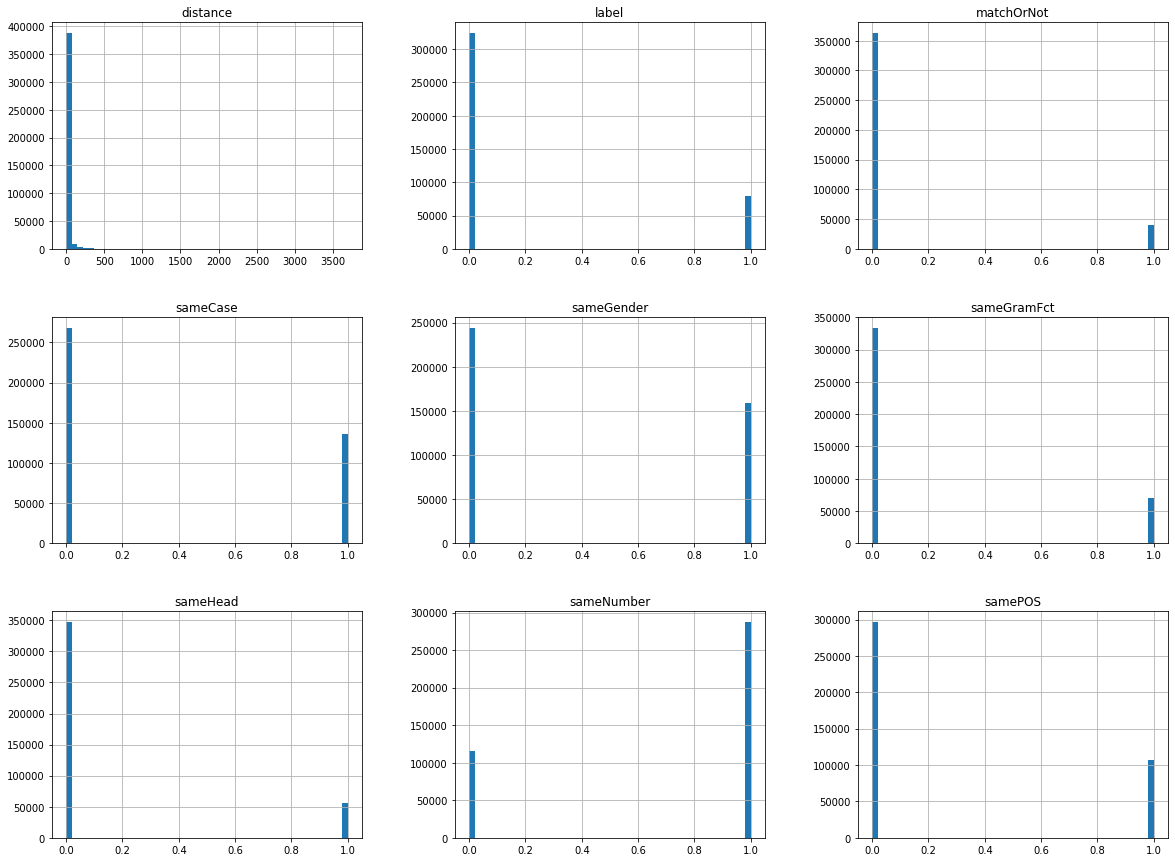

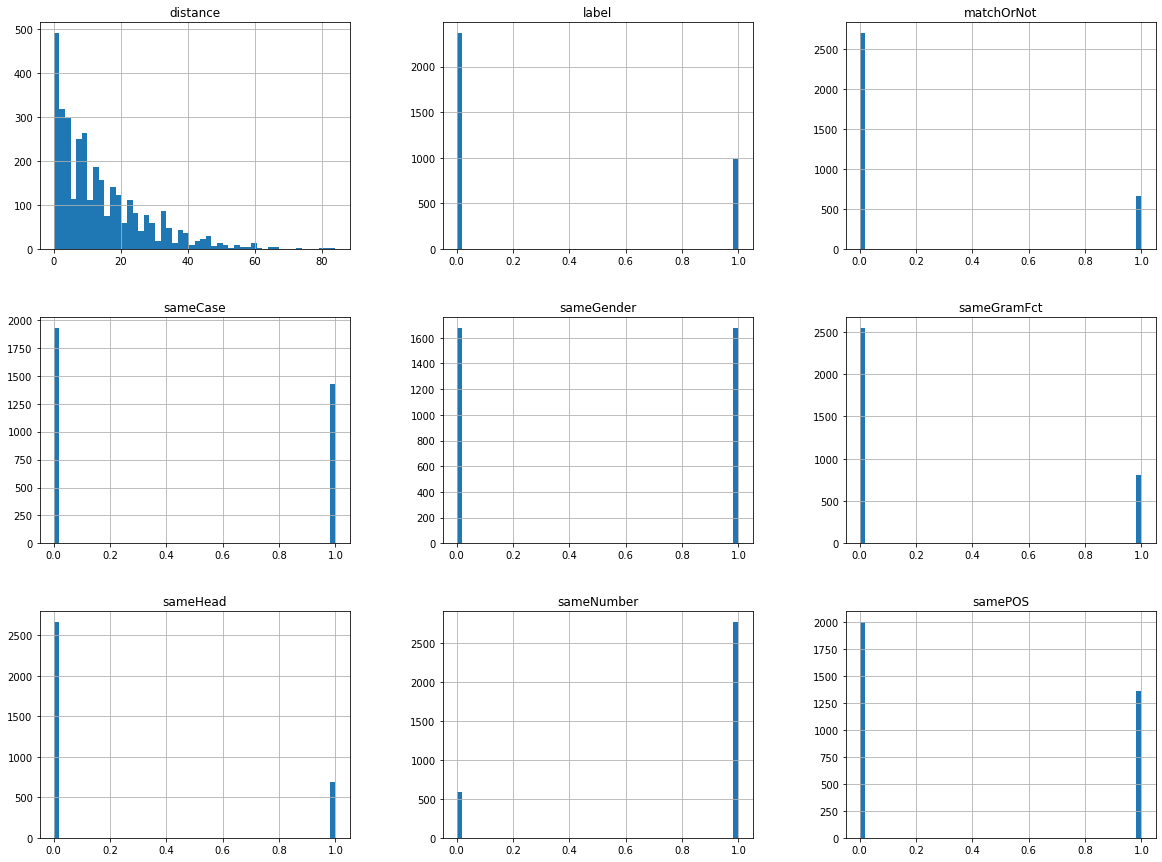

In [54]:
import matplotlib.pyplot as plt
df=df.drop(columns=['no'])
df1=df1.drop(columns=['no'])
df.hist(bins=50,figsize=(20,15))# plot the distrabution of all the matching features in training dataset.
df1.hist(bins=50,figsize=(20,15))# plot the distrabution of all the matching features in testing dataset.

In [55]:
df.describe()

,label,distance,sameHead,samePOS,sameGramFct,matchOrNot,sameCase,sameGender,sameNumber
count,403634.000000,403634.000000,403634.000000,403634.000000,403634.000000,403634.000000,403634.000000,403634.000000,403634.000000
mean,0.197300,18.563416,0.139708,0.265377,0.172852,0.101424,0.335398,0.394551,0.711979
std,0.397961,59.142225,0.346685,0.441534,0.378120,0.301889,0.472130,0.488755,0.452841
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,16.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3695.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
corr_matrix=df.corr()

corr_matrix["label"].sort_values(ascending=False) #find the correlate metrics of  label in training set

label          1.000000
distance       0.313996
sameGender     0.258394
sameNumber     0.149548
matchOrNot     0.128472
sameGramFct    0.078840
sameCase       0.071427
samePOS        0.070431
sameHead      -0.119450
Name: label, dtype: float64

In [57]:
corr_matrix1=df1.corr()
corr_matrix1["label"].sort_values(ascending=False)#find the correlate metrics of labels in testing set

label          1.000000
sameGender     0.415278
sameGramFct    0.321989
sameNumber     0.280074
matchOrNot     0.258656
sameCase       0.213792
sameHead       0.149504
samePOS        0.036229
distance      -0.066575
Name: label, dtype: float64

# Data preprocessing 
## Label encoding
### transfer the columns(features) into numeric metrics

In [58]:
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
	
    def fit(self, X, y=None):
        return self
	
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
	
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [59]:
le = MultiColumnLabelEncoder(columns=['POS1','gramFct1','Case1','Gender1','Number1','POS2','gramFct2','gramFct2','Case2','Gender2','Number2'])
X_train_le = le.fit_transform(X_train)
X_train_le.head()

,distance,POS1,gramFct1,Case1,Gender1,Number1,POS2,gramFct2,Case2,Gender2,Number2,sameHead,samePOS,sameGramFct,matchOrNot,sameCase,sameGender,sameNumber
257454,0,13,22,4,1,2,13,22,4,1,2,1,1,1,1,1,1,1
392476,8,3,5,2,3,2,13,22,4,1,2,0,0,0,0,0,0,1
57628,11,20,18,2,0,1,20,26,1,0,1,1,1,0,0,0,1,1
230075,16,13,18,2,2,2,9,24,0,0,0,0,0,0,0,0,0,0
234946,11,14,22,4,2,1,24,22,4,1,2,0,0,1,0,1,0,0


## one hot encoding of each features
### encode transfer the training set with one hot format 

In [60]:
ohe = OneHotEncoder(sparse=True , handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train_le)
X_train_ohe

<282543x1108 sparse matrix of type '<class 'numpy.float64'>'
	with 5085774 stored elements in Compressed Sparse Row format>

# Model training

## SGD

In [69]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42,max_iter=100)
sgd.fit(X_train_ohe,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Evaluation with SGD

In [70]:
from sklearn.model_selection import cross_val_score

#transform the input(X) in evaluating and testing data to an approprate way for SGD
X_test_le = le.transform(X_test)
X_test_ohe = ohe.transform(X_test_le)
X_te_le = le.transform(X_te)
X_te_ohe = ohe.transform(X_te_le)

#calculate the accuracy of sgd classifier of both data set
scores1 = cross_val_score(sgd,X_test_ohe,y_test,scoring='accuracy',cv=5) 
scores2=cross_val_score(sgd,X_te_ohe,y_te,scoring='accuracy',cv=5) 
scores1,scores2

(array([0.87439614, 0.87369421, 0.87893303, 0.86832108, 0.87504645]),
 array([0.86904762, 0.86011905, 0.89269747, 0.88077496, 0.88822653]))

### Test on SGD 
#### Test with precision, recall and f1 score

In [63]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 


print("Evaluate results on training set")
y_eva=sgd.predict(X_test_ohe)
print(precision_score(y_test,y_eva), recall_score(y_test,y_eva), f1_score(y_test,y_eva))
print("Test results on generated markable")
y_te_predict=sgd.predict(X_te_ohe)
print(precision_score(y_te,y_te_predict), recall_score(y_te,y_te_predict), f1_score(y_te,y_te_predict))

Evaluate results on training set
0.7958779884583677 0.4052556460414743 0.5370493991989319
Test results on generated markable
0.29365079365079366 0.03737373737373737 0.06630824372759857


## Decision Tree

In [64]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train_ohe,y_train)

y_test_predict=clf.predict(X_te_ohe)
print("Evaluation score:")
precision_score(y_te,y_test_predict), recall_score(y_te,y_test_predict), f1_score(y_te,y_test_predict)

Evaluation score:


(0.39978448275862066, 0.3747474747474748, 0.38686131386861317)

## Naive Bayes

In [65]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf = clf.fit(X_train_ohe,y_train)

y_test_predict=clf.predict(X_te_ohe)

precision_score(y_te,y_test_predict), recall_score(y_te,y_test_predict), f1_score(y_te,y_test_predict)

(0.48655256723716384, 0.402020202020202, 0.44026548672566373)

##  Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1000.0, solver= 'liblinear', random_state=0)
clf.fit(X_train_ohe, y_train)

y_test_predict=clf.predict(X_te_ohe)

precision_score(y_te,y_test_predict), recall_score(y_te,y_test_predict), f1_score(y_te,y_test_predict)

(0.13953488372093023, 0.024242424242424242, 0.04130808950086059)

## Perceptron

In [67]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-5, random_state=0)

clf.fit(X_train_ohe, y_train)

y_test_predict=clf.predict(X_te_ohe)

precision_score(y_te,y_test_predict), recall_score(y_te,y_test_predict), f1_score(y_te,y_test_predict)

(0.2861736334405145, 0.1797979797979798, 0.22084367245657568)

## Multi-Layer-Perceptron

### parameter tuning: gridsearch

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline


def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.1, 1, 10]
    gammas = [0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
def mlp_param_selection(X,y,nfolds):
    mlp =MLPClassifier()
    param_grid={
       'hidden_layer_sizes':[(100, 100), (50,50), (100,)],
       'activations':['logistic', 'tanh', 'relu'],
        'solvers': ['adam'],
       'alphas': [0.0001, 0.001],
        'learning_rates':['constant', 'invscaling', 'adaptive'],
        'max_iters':[100, 200, 300],
    }
    mlp_g = GridSearchCV(mlp, param_grid, cv=nfolds, n_jobs=-1, verbose=1)
    mlp_g.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
#p=svc_param_selection(X_train_ohe,y_train,2)
m=mlp_param_selection(X_train_ohe,y_train,5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


### MLP training and testing 

In [68]:
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', alpha=1e-5, activation='relu',
                   hidden_layer_sizes=(200,200), random_state=1,max_iter=200, batch_size = 512, verbose=1)                  
mlp.fit(X_train_ohe,y_train)
y_test_predict=mlp.predict(X_te_ohe)
precision_score(y_te,y_test_predict,labels=np.unique(y_te_predict)), recall_score(y_te,y_test_predict,labels=np.unique(y_te_predict)), f1_score(y_te,y_test_predict,labels=np.unique(y_te_predict))

Iteration 1, loss = 0.27578892
Iteration 2, loss = 0.22494391
Iteration 3, loss = 0.21233261
Iteration 4, loss = 0.20284774
Iteration 5, loss = 0.19511146
Iteration 6, loss = 0.18804923
Iteration 7, loss = 0.18187548
Iteration 8, loss = 0.17618617
Iteration 9, loss = 0.17106811
Iteration 10, loss = 0.16610981
Iteration 11, loss = 0.16128495
Iteration 12, loss = 0.15642207
Iteration 13, loss = 0.15197854
Iteration 14, loss = 0.14790045
Iteration 15, loss = 0.14390398
Iteration 16, loss = 0.13935871
Iteration 17, loss = 0.13626575
Iteration 18, loss = 0.13232528
Iteration 19, loss = 0.12945024
Iteration 20, loss = 0.12615267
Iteration 21, loss = 0.12284962
Iteration 22, loss = 0.12001398
Iteration 23, loss = 0.11714512
Iteration 24, loss = 0.11420103
Iteration 25, loss = 0.11188780
Iteration 26, loss = 0.10970814
Iteration 27, loss = 0.10679606
Iteration 28, loss = 0.10464124
Iteration 29, loss = 0.10222781
Iteration 30, loss = 0.10037747
Iteration 31, loss = 0.09829679
Iteration 32, los

C:\Users\kelly\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.4207650273224044, 0.3888888888888889, 0.4041994750656169)

# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_ohe,y_train)

y_test_predict=neigh.predict(X_te_ohe)

precision_score(y_te,y_test_predict), recall_score(y_te,y_test_predict), f1_score(y_te,y_test_predict)

(0.46689895470383275, 0.27070707070707073, 0.34271099744245526)